In [81]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime

In [82]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [83]:
df1 = pd.read_csv('singers_gender (1).csv', encoding= 'latin1') 
print(df1)

                 artist  gender                       category
0              12 Gauge    male  African-American_male_rappers
1                  1987    male           Swedish_male_singers
2              2 Chainz    male  African-American_male_rappers
3             2 Pistols    male  African-American_male_rappers
4             21 Savage    male  African-American_male_rappers
...                 ...     ...                            ...
23172     Øystein Sunde    male                Male_guitarists
23173      Øyvind Nypan    male                Male_guitarists
23174  Úna MacLochlainn  female           Irish_female_singers
23175      Úna Palliser  female           Irish_female_singers
23176      ?ebnem Ferah  female            Female_rock_singers

[23177 rows x 3 columns]


In [84]:
df1= df1.dropna(subset= ['gender'])
#dropping any entries with no value

In [85]:
df1=df1.rename(columns= {'artist':'Perfomer'})
#renaming the artist column as performer
#column now matches the billdboard hot 100 data set

In [86]:
df1['category'].value_counts()
#list of types of artists, including ethnicity and music style

American_male_guitarists                      3673
American_male_singers                         2257
American_female_singers                       2042
Male_guitarists                               1600
American_country_singers                      1368
English_male_singers                          1320
African-American_male_rappers                  938
Canadian_male_singers                          733
American_male_singer-songwriters               719
English_female_singers                         675
American_female_country_singers                579
American_female_singer-songwriters             572
African-American_female_singers                459
American_female_guitarists                     458
Australian_male_singers                        439
French_male_singers                            410
Swedish_female_singers                         371
Canadian_female_singers                        368
French_female_singers                          308
African-American_male_singers  

In [87]:
df1=df1.drop(['category'], axis=1)
#after looking at category (just for fun), i dropped it because it was not needed

In [88]:
df2 = pd.read_csv('billboardHotWeekly.csv') 

In [89]:
#cleaning the data
df2 = df2.drop_duplicates(subset='Song') #dropping songs that were on the top 100 mulitple times
df2= df2.drop(['SongID', 'PreviousWeekPosition', 'PeakPosition', 'Week Position', 'Instance', 'url'], axis=1)
#dropping the columns i won't be working with
df2 = df2.reset_index(drop='True')

In [90]:
df1['gender'].value_counts()

male      15236
female     7941
Name: gender, dtype: int64

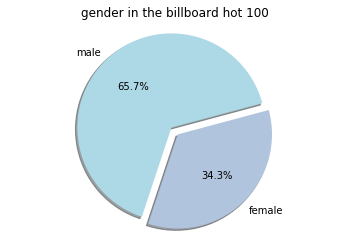

In [91]:

gender = [15236,7941]

my_labels = 'male','female',
my_colors = ['lightblue','lightsteelblue']
my_explode = (0.1, 0)
plt.pie(gender, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('gender in the billboard hot 100')
plt.axis('equal')
plt.show()

In [92]:
df2 = df2.sort_values(by='WeekID')
df2 = df2.set_index(['WeekID'])
print(df2)

                             Song                           Performer  \
WeekID                                                                  
1/1/1966                   I Will                         Dean Martin   
1/1/1966       Puppet On A String  Elvis Presley With The Jordanaires   
1/1/1966               Blue River                       Elvis Presley   
1/1/1966        I Hear A Symphony                        The Supremes   
1/1/1966                 Buckaroo        Buck Owens and The Buckaroos   
...                           ...                                 ...   
9/9/2017      Its Every Night Sis     RiceGum Featuring Alissa Violet   
9/9/2017             Transportin'                         Kodak Black   
9/9/2017                  For Her                          Chris Lane   
9/9/2017               Rake It Up      Yo Gotti Featuring Nicki Minaj   
9/9/2017  I Could Use A Love Song                        Maren Morris   

          WeeksOnChart  Unnamed: 10  Unnamed: 11  

In [93]:
'sixties'= df2.loc['1/1/66':'12/31/69']
'seventies'= df2.loc['1/1/70':'12/31/79']
'eighties'= df2.loc['1/1/80':'12/31/89']
'nineties'= df2.loc['1/1/90':'12/31/99']
'oughts'= df2.loc['1/1/00':'12/31/09']
'tens'= df2.loc['1/1/10':'9/9/17']

SyntaxError: can't assign to literal (<ipython-input-93-abc062247bdd>, line 1)

In [ ]:
df1['Performer'].isin(df2['Performer']).valuecounts()

In [ ]:
df = pd.merge(df1,
                 df2[['Performer', 'WeekID']],
                 on='Performer')
df.head()
#merge the two dataframes into one using Performer as the common value

In [ ]:
N = 6
men = (value, value, value, value, value, value)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, men, width, bottom=0*cm)


women= (value, value, value, value, value)
p2 = ax.bar(ind + width, women, width, bottom=0*cm)

ax.set_title('Songs on the Hot 100 by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('sixties'', 'seventies', 'eighties', 'nineties', 'oughts', 'tens'))

ax.legend((p1[0], p2[0]), ('Men', 'Women'))
ax.autoscale_view()

plt.show()

In [ ]:
print(df)